In [1]:
import networkx as nx
import random

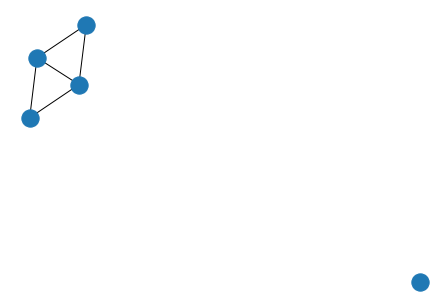

In [2]:
g=nx.gnm_random_graph(5,5)
nx.draw(g)

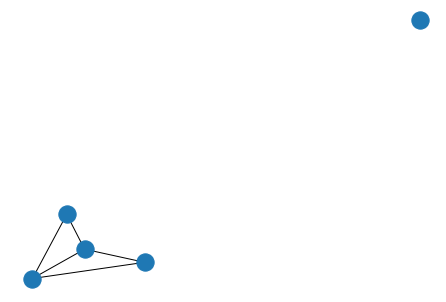

In [3]:
for (u, v) in g.edges():
    g.edges[u,v]['weight'] = random.randint(0,10)
nx.draw(g)

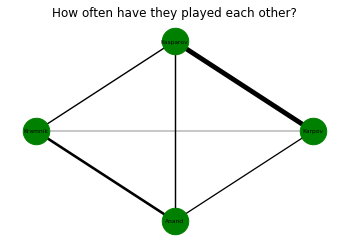

In [4]:
#1. Import pyplot and nx
import matplotlib.pyplot as plt
import networkx as nx
 
 
def plot_weighted_graph():
    "Plot a weighted graph"
 
    #2. Add nodes
    G = nx.Graph() #Create a graph object called G
    node_list = ['Karpov','Kasparov','Kramnik','Anand']
    for node in node_list:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.circular_layout(G) 
    nx.draw_networkx_nodes(G,pos,node_color='green',node_size=700)
 
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in node_list:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
 
 
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    G.add_edge(node_list[0],node_list[1],weight=170) #Karpov vs Kasparov
    G.add_edge(node_list[0],node_list[2],weight=15) #Karpov vs Kramnik
    G.add_edge(node_list[0],node_list[3],weight=45) #Karpov vs Anand
    G.add_edge(node_list[1],node_list[2],weight=49) #Kasparov vs Kramnik
    G.add_edge(node_list[1],node_list[3],weight=51) #Kasparov vs Anand
    G.add_edge(node_list[2],node_list[3],weight=91) #Kramnik vs Anand
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(node_list)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
    plt.axis('off')
    plt.title('How often have they played each other?')
    plt.savefig("chess_legends.png") 
    plt.show() 
 
#----START OF SCRIPT
if __name__=='__main__':
    plot_weighted_graph()

##### reading data from source and converting to adjacency matrix with weights as costs

In [5]:
import pandas as pd

In [6]:
df = pd.read_excel (r'F:\Harshi College\MS DA\Network science\lab\business intermediaries\data.xlsx', sheet_name="Sheet1")
print (df)
copyDf = df

    sellers  traders  buyers  Unnamed: 3  Unnamed: 4  sellers.1  traders.1  \
0       1.0      1.0     1.0         NaN         NaN          1          1   
1       2.0      2.0     2.0         NaN         NaN          2          1   
2       3.0      3.0     3.0         NaN         NaN          3          2   
3       4.0      4.0     4.0         NaN         NaN          4          2   
4       5.0      5.0     5.0         NaN         NaN          5          1   
5       6.0      6.0     6.0         NaN         NaN          6          1   
6       7.0      7.0     7.0         NaN         NaN          7          1   
7       8.0      8.0     8.0         NaN         NaN          8          2   
8       NaN      NaN     NaN         NaN         NaN          5          1   
9       NaN      NaN     NaN         NaN         NaN          6          1   
10      NaN      NaN     NaN         NaN         NaN          7          2   
11      NaN      NaN     NaN         NaN         NaN          8 

In [7]:
df.columns.values

array(['sellers', 'traders', 'buyers', 'Unnamed: 3', 'Unnamed: 4',
       'sellers.1', 'traders.1', 'sellers to traders price', 'Unnamed: 8',
       'traders.2', 'buyers.1', 'traders to buyers price'], dtype=object)

In [8]:
# extracting only the required columns from the df
df = df[['sellers.1','traders.1', 'buyers.1', 'sellers to traders price', 'traders to buyers price']]
df

,sellers.1,traders.1,buyers.1,sellers to traders price,traders to buyers price
0,1,1,1,53,44
1,2,1,4,5,33
2,3,2,2,6,322
3,4,2,3,47,971
4,5,1,1,8,35
5,6,1,1,19,33
6,7,1,4,10,44
7,8,2,2,161,15
8,5,1,2,55,65
9,6,1,3,63,94


In [9]:
# renaming the values in sellers columns for propering representation of nodes in graphs
for i in range(len(df['sellers.1'])):
    df['sellers.1'][i] = "S-" + str(df['sellers.1'][i])
    
# renaming the values in traders columns for propering representation of nodes in graphs
for i in range(len(df['traders.1'])):
    df['traders.1'][i] = "T-" + str(df['traders.1'][i])
    
# renaming the values in buyers columns for propering representation of nodes in graphs
for i in range(len(df['buyers.1'])):
    df['buyers.1'][i] = "B-" + str(df['buyers.1'][i])
df

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Admin\AppData\Local\Temp/ipykernel_10092/2418660758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sellers.1'][i] = "S-" + str(df['sellers.1'][i])
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,sellers.1,traders.1,buyers.1,sellers to traders price,traders to buyers price
0,S-1,T-1,B-1,53,44
1,S-2,T-1,B-4,5,33
2,S-3,T-2,B-2,6,322
3,S-4,T-2,B-3,47,971
4,S-5,T-1,B-1,8,35
5,S-6,T-1,B-1,19,33
6,S-7,T-1,B-4,10,44
7,S-8,T-2,B-2,161,15
8,S-5,T-1,B-2,55,65
9,S-6,T-1,B-3,63,94


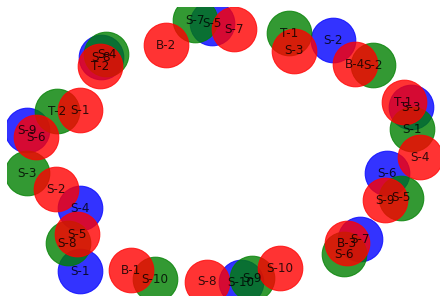

In [10]:
# graph required is a digraph
G = nx.DiGraph()

# for sellers 
# converting set to tuple. unpacking it to add every value as seperate nodes
sellerNodesList = tuple(set(df['sellers.1']))
sellerNodesList = (*sellerNodesList,) #adding comma to end makes it a tuple

# creating graph and adding nodes to it
G.add_nodes_from(sellerNodesList)
# adding spaces between the nodes to avoid over lapping
pos = nx.spring_layout(G, k=0.2, iterations=20)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
nx.draw(G, 
        with_labels = True, 
        node_color='b', 
        node_size=2000,
        alpha=0.8, #decreases the transparnecy of the node
        font_size=12)



# adding traders nodes to the graph
tradersNodesList = tuple(set(df['traders.1']))
tradersNodesList = (*tradersNodesList,)

G.add_nodes_from(tradersNodesList)
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, 
        with_labels = True, 
        node_color='g', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)



# adding buyers nodes to the graph
buyersNodesList = tuple(set(df['buyers.1']))
buyersNodesList = (*buyersNodesList,)

G.add_nodes_from(buyersNodesList)

pos = nx.spring_layout(G, k=0.01, iterations=20)
nx.draw(G, 
        with_labels = True, 
        node_color='r', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)



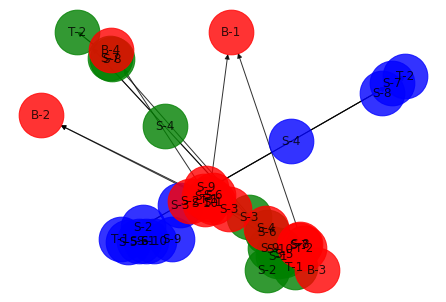

In [11]:
# graph required is a digraph
G = nx.DiGraph()

# for sellers 
# converting set to tuple. unpacking it to add every value as seperate nodes
sellerNodesList = tuple(set(df['sellers.1']))
sellerNodesList = (*sellerNodesList,) #adding comma to end makes it a tuple

# creating graph and adding nodes to it
G.add_nodes_from(sellerNodesList)
# adding spaces between the nodes to avoid over lapping
pos = nx.spring_layout(G, k=0.2, iterations=20)
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50
# adding edges
for i in range(len(df['sellers.1'])): 
    G.add_edge(df['sellers.1'][i], df['traders.1'][i], weight=df['sellers to traders price'][i])

nx.draw(G, 
        with_labels = True, 
        node_color='b', 
        node_size=2000,
        alpha=0.8, #decreases the transparnecy of the node
        font_size=12)


# adding traders nodes to the graph
tradersNodesList = tuple(set(df['traders.1']))
tradersNodesList = (*tradersNodesList,)

G.add_nodes_from(tradersNodesList)
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, 
        with_labels = True, 
        node_color='g', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)



# adding buyers nodes to the graph
buyersNodesList = tuple(set(df['buyers.1']))
buyersNodesList = (*buyersNodesList,)

# G.add_nodes_from(buyersNodesList)

for i in range(len(df['buyers.1'])): 
    G.add_edge(df['traders.1'][i], df['buyers.1'][i], weight=df['traders to buyers price'][i])

pos = nx.spring_layout(G, k=0.01, iterations=20)
nx.draw(G, 
        with_labels = True, 
        node_color='r', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)



In [12]:
for i in range(len(df['sellers.1'])): 
    G.add_edge(df['sellers.1'][i], df['traders.1'][i], weight=df['sellers to traders price'][i])
    G.add_edge(df['traders.1'][i], df['buyers.1'][i], weight=df['traders to buyers price'][i])

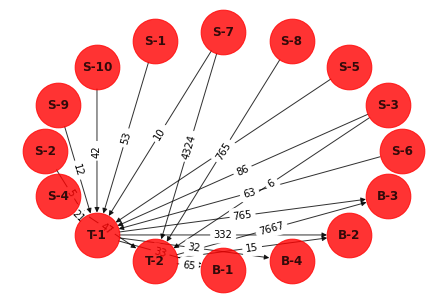

In [13]:
pos=nx.circular_layout(G)
pos
nx.draw(G, 
        pos, 
        with_labels=True, 
        font_weight='bold',
        node_color='r', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.savefig('img.jpg')
plt.show()

##### graph between sellers and traders only - trail

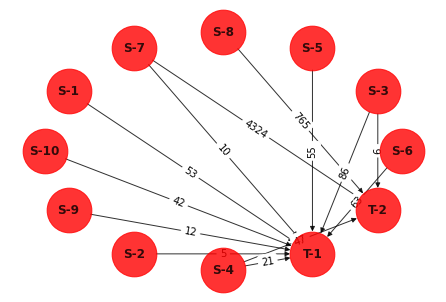

In [14]:
G = nx.DiGraph()

# for sellers 
sellerNodesList = tuple(set(df['sellers.1']))
sellerNodesList = (*sellerNodesList,) #adding comma to end makes it a tuple

# creating graph and adding nodes to it
G.add_nodes_from(sellerNodesList)
# adding spaces between the nodes to avoid over lapping
pos = nx.spring_layout(G, k=0.2, iterations=20)

# adding edges to graph
for i in range(len(df['sellers.1'])): 
    G.add_edge(df['sellers.1'][i], df['traders.1'][i], weight=df['sellers to traders price'][i])

# https://www.askpython.com/python-modules/networkx-package 
pos=nx.circular_layout(G)
nx.draw(G, 
        pos, 
        with_labels=True, 
        font_weight='bold',
        node_color='r', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()



In [15]:
# adding edges - btwn traders and sellers, buyers and traders
for i in range(len(df['sellers.1'])): 
    G.add_edge(df['sellers.1'][i], df['traders.1'][i], weight=df['sellers to traders price'][i])
    G.add_edge(df['buyers.1'][i], df['traders.1'][i], weight=df['traders to buyers price'][i])
    

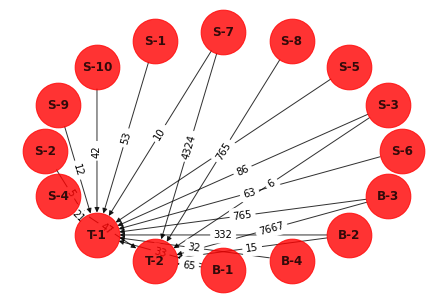

In [16]:
# full graph
pos=nx.circular_layout(G)
nx.draw(G, 
        pos, 
        with_labels=True, 
        font_weight='bold',
        node_color='r', 
        node_size=2000,
        alpha=0.8, 
        font_size=12)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

##### finding to which trader will every seller sell 

In [17]:
import numpy as np

In [18]:
# for i in range(max(df['sellers.1'])):
#     print(i)

(df['sellers.1'].sort_values)
(type(df['sellers.1'][5]))
a = sorted(df['sellers.1'].to_numpy(), reverse=True)
print(a)
val = str(a[0]).split('-')
print(val[-1])

['S-9', 'S-8', 'S-8', 'S-7', 'S-7', 'S-6', 'S-6', 'S-5', 'S-5', 'S-4', 'S-4', 'S-3', 'S-3', 'S-2', 'S-10', 'S-1']
9


In [26]:
copyDf = copyDf[['sellers.1','traders.1','sellers to traders price','buyers.1','traders to buyers price']]
copyDf

# finding the best price for seller to sell his product to the trader

# df.index[df['column_name']==value].tolist()
value = max(df['sellers to traders price'])
bestPrice = df.index[df['sellers to traders price'] == value].tolist()

bestPrice = bestPrice[0]
bestPrice

# print((copyDf.iloc[bestPrice, : ]))
bestRow = copyDf.iloc[bestPrice, : ]
print(f"\nthe best price at which seller-{bestRow[0]} can sell his product to the trader-{bestRow[1]} is Rs.{bestRow[2]}")


the best price at which seller-7 can sell his product to the trader-2 is Rs.4324


In [27]:
# # finding the best price for trader to sell his product to the buyer

# # df.index[df['column_name']==value].tolist()
# value = max(df['traders to buyers price'])
# print(value)
# bestPrice = df.index[df['traders to buyers price'] == value].tolist()

# copyDf[:bestPrice]

In [28]:
#select rows where 'sellers' column is equal to 1
copyDf.loc[copyDf['sellers.1'] == 1]

for i in range(1,max(copyDf['sellers.1'])+1):
    reqDf = copyDf.loc[copyDf['sellers.1'] == i]
    
    value = max(reqDf['sellers to traders price'])

    bestPrice = reqDf.index[reqDf['sellers to traders price'] == value].tolist()

    bestPrice = bestPrice[0]

    # print((copyDf.iloc[bestPrice, : ]))
    bestRow = copyDf.iloc[bestPrice, : ]
    print(f"\nthe best price at which seller-{bestRow[0]} can sell his product to the trader-{bestRow[1]} is Rs.{bestRow[2]}")


the best price at which seller-1 can sell his product to the trader-1 is Rs.53

the best price at which seller-2 can sell his product to the trader-1 is Rs.5

the best price at which seller-3 can sell his product to the trader-1 is Rs.86

the best price at which seller-4 can sell his product to the trader-2 is Rs.47

the best price at which seller-5 can sell his product to the trader-1 is Rs.55

the best price at which seller-6 can sell his product to the trader-1 is Rs.63

the best price at which seller-7 can sell his product to the trader-2 is Rs.4324

the best price at which seller-8 can sell his product to the trader-2 is Rs.765

the best price at which seller-9 can sell his product to the trader-1 is Rs.12

the best price at which seller-10 can sell his product to the trader-1 is Rs.42


In [29]:
#select rows where 'traders' column is equal to 1
copyDf.loc[copyDf['sellers.1'] == 1]

for i in range(1,max(copyDf['traders.1'])+1):
    reqDf = copyDf.loc[copyDf['buyers.1'] == i]
#     print(reqDf)
    
    value = max(reqDf['traders to buyers price'])

    bestPrice = reqDf.index[reqDf['traders to buyers price'] == value].tolist()

    bestPrice = bestPrice[0]

    # print((copyDf.iloc[bestPrice, : ]))
    bestRow = copyDf.iloc[bestPrice, : ]
    print(f"\nthe best price at which trader-{bestRow[1]} can sell his product to the buyer-{bestRow[-2]} is Rs.{bestRow[2]}")


the best price at which trader-2 can sell his product to the buyer-1 is Rs.4324

the best price at which trader-1 can sell his product to the buyer-2 is Rs.86


In [30]:
#select rows where 'traders' column is equal to 1
copyDf.loc[copyDf['sellers.1'] == 1]

for i in range(1,max(copyDf['buyers.1'])+1):
    reqDf = copyDf.loc[copyDf['buyers.1'] == i]
#     print(reqDf)
    
    value = min(reqDf['traders to buyers price'])

    bestPrice = reqDf.index[reqDf['traders to buyers price'] == value].tolist()

    bestPrice = bestPrice[0]

    # print((copyDf.iloc[bestPrice, : ]))
    bestRow = copyDf.iloc[bestPrice, : ]
    print(f"\nthe least price at which buyer-{bestRow[-2]} can buy his product from the trader-{bestRow[1]} is Rs.{bestRow[2]}")


the least price at which buyer-1 can buy his product from the trader-1 is Rs.19

the least price at which buyer-2 can buy his product from the trader-2 is Rs.161

the least price at which buyer-3 can buy his product from the trader-1 is Rs.63

the least price at which buyer-4 can buy his product from the trader-1 is Rs.42


##### calculating payoff for every trader

In [32]:
print("the pay off for every trader")
tv = set(df["traders.1"])
# print(tv)
for i in range(len(tv)):
    rr = (list(tv)[i])
#     print(rr,"===")
    
    ll = df.index[df['traders.1'] == rr].tolist()
#     print(df.ll,"..")
    
    summ = 0
    for i in range(len(ll)):
        v = df.iloc[i][-1]
    #     print(v)
        summ = summ + int(v)
#     print(rr, "==", summ)
    
    et = set(df["traders.1"])
    bb = df.index[df['traders.1'] == rr].tolist()

    vvList = []
    for i in range(len(bb)):
            vv = df.iloc[i][-2]
#             print(vv)
            vvList.append(vv)
#             print()

    minVal = min(vvList)
    
    print(rr, "==", summ-minVal)
    print()

the pay off for every trader
T-1 == 1716

T-2 == 1400

